In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 # opencv

### Bring in images for review

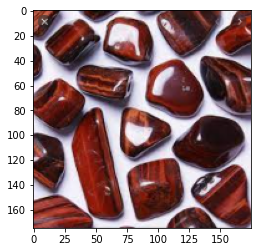

In [2]:
tiger_colors = ['red','blue','gold']
size = 175

for color in tiger_colors:
    path = os.path.join('./images/',color)
    for tiger in os.listdir(path):
        tiger_img = cv2.imread(os.path.join(path,tiger))
        tiger_img = cv2.cvtColor(tiger_img,cv2.COLOR_BGR2RGB)
        tiger_img = cv2.resize(tiger_img,(size,size))
        plt.imshow(tiger_img)
        plt.show
        break
    break

### Defined a function to create the training data

In [3]:
training_data = []

def create_train_data(img_size):
    color_label = ['red','blue','gold'] # folder labels of respective colors
    for color in color_label:
        path = os.path.join('./images/',color) # folder path
        label_num = color_label.index(color) # index the colors
        for tiger in os.listdir(path): # for every image in the folder path
            try:
                tiger_img = cv2.imread(os.path.join(path,tiger)) # read in images
                tiger_img = cv2.cvtColor(tiger_img,cv2.COLOR_BGR2RGB) # convert images to RGB
                tiger_img = cv2.resize(tiger_img,(img_size,img_size),3) # resize the image
                training_data.append([tiger_img,label_num]) # add images with respective label
            except:
                pass # skip images that cannot convert to training data
        
create_train_data(200)# call function with value of image size

In [4]:
print(len(training_data)) # check how many images were converted

2259


### Convert to array and try to Reshape images

In [5]:
import random
random.shuffle(training_data[:5])


X = []
y = []

for feat, labels in training_data:
    X.append(feat)
    y.append(labels)
    

# convert data into array and reshape
X = np.array(X).reshape(-1, 200,200, 3) 
# X = np.array(X)
y = np.array(y).reshape(len(y),1)

In [6]:
X.shape

(2259, 200, 200, 3)

In [7]:
y.shape

(2259, 1)

## Save data

In [8]:
import pickle 

# used pickle to save the X data
pickle_out = open("./pickle/X_data.pkl", mode= "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

# used pickle to save the label data
pickle_out = open("./pickle/y_data.pkl", mode= "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

#### Check to see if save was succesful

In [9]:
# X data
pickle_in = open("./pickle/X_data.pkl", mode='rb')
X2 = pickle.load(pickle_in)


# y data: Labels
pickle_in = open("./pickle/y_data.pkl", mode='rb')
y2 = pickle.load(pickle_in)

In [10]:
X2[1]

array([[[174,  79,  61],
        [153,  60,  41],
        [152,  62,  42],
        ...,
        [ 94,  37,  21],
        [105,  51,  38],
        [ 97,  43,  37]],

       [[160,  65,  48],
        [162,  70,  51],
        [162,  73,  54],
        ...,
        [ 97,  45,  34],
        [110,  60,  52],
        [ 99,  48,  45]],

       [[164,  70,  54],
        [183,  91,  74],
        [172,  83,  65],
        ...,
        [ 80,  36,  33],
        [ 86,  43,  42],
        [ 87,  39,  41]],

       ...,

       [[121,  34,  33],
        [129,  41,  41],
        [140,  52,  52],
        ...,
        [104,  81, 104],
        [126, 107, 132],
        [176, 163, 187]],

       [[175,  67,  61],
        [175,  69,  62],
        [176,  70,  64],
        ...,
        [136, 120, 147],
        [174, 161, 188],
        [205, 197, 223]],

       [[153,  68,  64],
        [156,  71,  67],
        [152,  68,  65],
        ...,
        [150, 140, 161],
        [171, 163, 184],
        [185, 180, 201]]

In [11]:
y2

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [2]])